## NAME: 
## STUDENT ID:

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import apmodule as ap

In [3]:
# we load the prices and calculate the future returns
prices = pd.read_csv('Prices.csv', parse_dates=['date']).set_index(['id', 'date'])
future_returns = np.log(prices['price'].groupby('id').shift(-1) / prices['price']).rename('fut_ret')
# we load the information signal. To make our code more general we are going to rename the information signal
EPQ = pd.read_csv('EPQ.csv', parse_dates=['date']).set_index(['id', 'date'])
EP12 = pd.read_csv('EP12.csv', parse_dates=['date']).set_index(['id', 'date'])
BTM = pd.read_csv('BTM.csv', parse_dates=['date']).set_index(['id', 'date'])

In [4]:
# loading market_cap data
market_cap = pd.read_csv('Market_cap.csv', parse_dates=['date']).set_index(['id', 'date']).squeeze()


In [5]:
# loading choosen factor for backtesting
factor = pd.read_csv('EPQ.csv', parse_dates=['date']).set_index(['id', 'date']).squeeze()

In [6]:
# loading names file
names = pd.read_csv('names.csv').set_index('id')

In [7]:
# loading total_volatility
total_volatility = pd.read_csv('TVOL.csv', parse_dates=['date']).set_index(['id', 'date'])

# Quantile Analysis on EPQ

### 1) Loading the Data

In [8]:
signal = EPQ
# we merge signal and future returns in the same DataFrame
data = signal.join(future_returns).dropna()
data.head()

epq   fut_ret
id    date                          
10001 1986-11-28 -0.341051  0.014889
      1986-12-31 -0.243300 -0.036368
      1987-01-30 -0.323111 -0.076961
      1987-02-27  0.418786  0.036139
      1987-03-31  0.410650 -0.040005

### 2) Using quantile_analysis method from apmodule

In [9]:
# Using ap.quantile_analysis
port_returns, performance = ap.quantile_analysis(signal['epq'], prices['price'])

### 3) Measuring the performance and plotting the graph

In [10]:
# Checking performance
performance

,1,2,3,4,Benchmark,Active,Neutral
Mean Return,-0.216346,-0.028028,0.075083,0.124912,-0.011387,0.136300,0.341259
St. Dev.,0.291057,0.208456,0.167613,0.187895,0.204122,0.065662,0.171361
RR Ratio,-0.743312,-0.134456,0.447953,0.664799,-0.055786,2.075766,1.991463
% Positive,0.411531,0.556660,0.626243,0.654076,0.538767,0.803181,0.805169
Worst Month,-0.397810,-0.380631,-0.333861,-0.341914,-0.360247,-0.089565,-0.235912
Best Month,0.376888,0.172706,0.129099,0.160368,0.173013,0.119349,0.302583
Max DrawDown,-1.448609,-0.823229,-0.698071,-0.870301,-0.926359,-0.221154,-0.493979


In [11]:
# Converted monthly returns into a series of portfolio prices. 
port_values = port_returns.cumsum().apply(np.exp)


<AxesSubplot:title={'center':'EPQ Quantile Analysis'}, xlabel='Time', ylabel='Portfolio Value'>

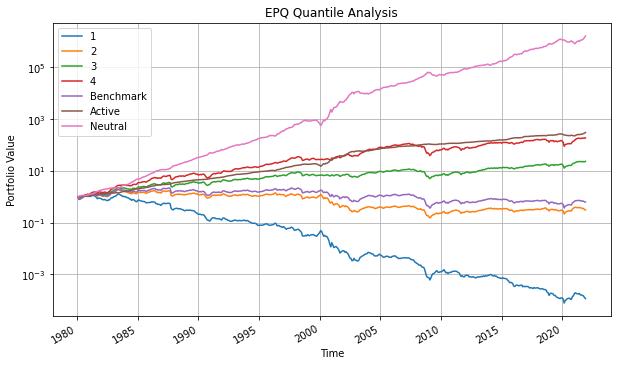

In [12]:
# Plotting the graph
port_values.plot(figsize=(10,6),
                 title='EPQ Quantile Analysis',
                 xlabel='Time',
                 ylabel='Portfolio Value',
                 logy=True, grid=True)

### 4) Calculating predictive power

In [13]:
# Using ic_analysis() method
ic3 = ap.ic_analysis(signal['epq'], prices['price'], frequency='annual')
ic3

Average IC: 0.139 

Percentage of Positive Periods: 0.902 

Percentage of Negative Periods: 0.098 

T-Stat: 7.063 P-Value: 0.0 



date
1980-12-31    0.319190
1981-12-31    0.115092
1982-12-31    0.100469
1983-12-30    0.346530
1984-12-31    0.215111
1985-12-31    0.270777
1986-12-31    0.091205
1987-12-31    0.175529
1988-12-30    0.119609
1989-12-29    0.163852
1990-12-31    0.057595
1991-12-31    0.128849
1992-12-31    0.061309
1993-12-31    0.119451
1994-12-30    0.104302
1995-12-29    0.153754
1996-12-31    0.231832
1997-12-31    0.065376
1998-12-31   -0.174219
1999-12-31    0.268094
2000-12-29    0.237084
2001-12-31    0.387327
2002-12-31   -0.148752
2003-12-31    0.187034
2004-12-31    0.174037
2005-12-30    0.107364
2006-12-29    0.103530
2007-12-31    0.236287
2008-12-31   -0.027719
2009-12-31    0.047985
2010-12-31    0.204714
2011-12-30    0.053476
2012-12-31    0.068335
2013-12-31    0.210191
2014-12-31    0.148501
2015-12-31    0.239722
2016-12-30    0.085066
2017-12-29    0.121949
2018-12-31    0.170866
2019-12-31   -0.186061
2020-12-31    0.326564
Name: IC_epq, dtype: float64

<AxesSubplot:title={'center':'Predictive Power of EPQ over time'}, xlabel='date'>

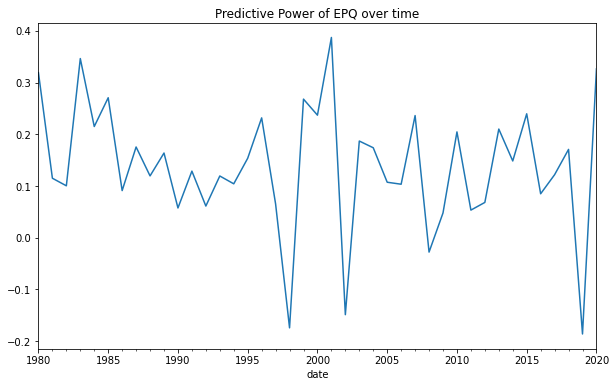

In [14]:
# Plotting the IC analysis result
ic3.plot(kind = 'line', figsize=(10,6), title="Predictive Power of EPQ over time")

# Quantile Analysis on EP12

### 1) Loading the Data

In [15]:
signal = EP12
# we merge signal and future returns in the same DataFrame
data = signal.join(future_returns).dropna()
data.head()

ep12   fut_ret
id    date                          
10001 1986-11-28  0.279810  0.014889
      1986-12-31  0.371429 -0.036368
      1987-01-30  0.428972 -0.076961
      1987-02-27  0.269828  0.036139
      1987-03-31  0.263112 -0.040005

### 2) Using quantile_analysis method from apmodule

In [16]:
# Using ap.quantile_analysis
port_returns_12, performance_12 = ap.quantile_analysis(signal['ep12'], prices['price'])

### 3) Measuring the performance and plotting the graph

In [17]:
# Checking performance
performance_12

,1,2,3,4,Benchmark,Active,Neutral
Mean Return,-0.193946,-0.016945,0.064209,0.105968,-0.010217,0.116185,0.299914
St. Dev.,0.298896,0.210603,0.164762,0.184632,0.204264,0.070475,0.184870
RR Ratio,-0.648873,-0.080461,0.389709,0.573942,-0.050018,1.648605,1.622295
% Positive,0.429423,0.568588,0.628231,0.642147,0.538767,0.745527,0.749503
Worst Month,-0.407126,-0.376911,-0.343536,-0.341840,-0.358455,-0.098026,-0.231054
Best Month,0.379770,0.172121,0.126829,0.182015,0.173895,0.116654,0.301485
Max DrawDown,-1.473227,-0.855285,-0.699017,-0.830295,-0.930144,-0.249745,-0.545429


In [18]:
# Converted monthly returns into a series of portfolio prices. 
port_values_12 = port_returns_12.cumsum().apply(np.exp)

<AxesSubplot:title={'center':'EP12 Quantile Analysis'}, xlabel='Time', ylabel='Portfolio Value'>

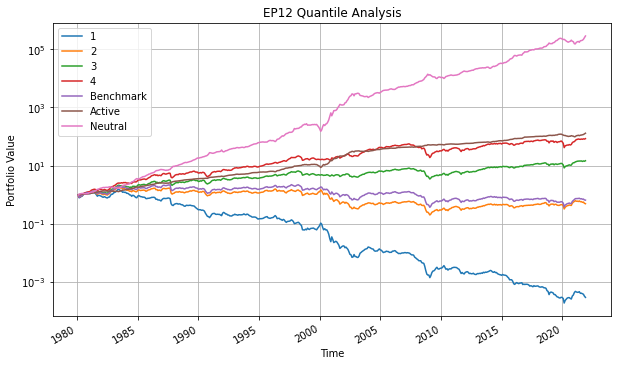

In [19]:
# Plotting the graph
port_values_12.plot(figsize=(10,6),
                 title='EP12 Quantile Analysis',
                 xlabel='Time',
                 ylabel='Portfolio Value',
                 logy=True, grid=True)

### 4) Calculating predictive power

In [20]:
# Using ic_analysis() method
ic12 = ap.ic_analysis(signal['ep12'], prices['price'], frequency='annual')
ic12

Average IC: 0.128 

Percentage of Positive Periods: 0.878 

Percentage of Negative Periods: 0.122 

T-Stat: 6.048 P-Value: 0.0 



date
1980-12-31    0.292005
1981-12-31    0.082089
1982-12-31    0.057774
1983-12-30    0.411572
1984-12-31    0.205763
1985-12-31    0.245201
1986-12-31    0.061584
1987-12-31    0.166673
1988-12-30    0.129100
1989-12-29    0.139833
1990-12-31    0.048339
1991-12-31    0.064259
1992-12-31    0.026969
1993-12-31    0.129962
1994-12-30    0.080169
1995-12-29    0.139897
1996-12-31    0.279999
1997-12-31    0.056488
1998-12-31   -0.180698
1999-12-31    0.246589
2000-12-29    0.230851
2001-12-31    0.372151
2002-12-31   -0.216833
2003-12-31    0.176995
2004-12-31    0.172402
2005-12-30    0.096757
2006-12-29    0.072600
2007-12-31    0.238149
2008-12-31   -0.030162
2009-12-31   -0.012758
2010-12-31    0.201169
2011-12-30    0.031696
2012-12-31    0.058771
2013-12-31    0.209470
2014-12-31    0.184455
2015-12-31    0.267290
2016-12-30    0.112969
2017-12-29    0.137326
2018-12-31    0.170415
2019-12-31   -0.194493
2020-12-31    0.279608
Name: IC_ep12, dtype: float64

<AxesSubplot:title={'center':'Predictive Power of EP12 over time'}, xlabel='date'>

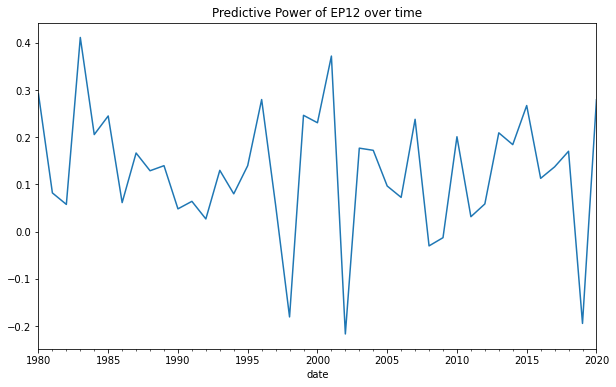

In [21]:
# Plotting the IC analysis result
ic12.plot(kind = 'line', figsize=(10,6), title="Predictive Power of EP12 over time")

# Quantile Analysis on BTM

### 1) Loading the Data

In [22]:
signal = BTM
# we merge signal and future returns in the same DataFrame
data = signal.join(future_returns).dropna()
data.head()

btm   fut_ret
id    date                          
10001 1986-11-28  0.394506  0.014889
      1986-12-31  0.328332 -0.036368
      1987-01-30  0.571900 -0.076961
      1987-02-27  0.865770  0.036139
      1987-03-31  0.930039 -0.040005

### 2) Using quantile_analysis method from apmodule

In [23]:
# Using ap.quantile_analysis
port_returns_btm, performance_btm = ap.quantile_analysis(signal['btm'], prices['price'])

### 3) Measuring the performance and plotting the graph

In [24]:
# Checking performance
performance_btm

,1,2,3,4,Benchmark,Active,Neutral
Mean Return,-0.073424,-0.010369,0.031226,0.028269,-0.006084,0.034353,0.101694
St. Dev.,0.232443,0.197822,0.186549,0.222731,0.202146,0.073594,0.143550
RR Ratio,-0.315881,-0.052416,0.167385,0.126922,-0.030095,0.466788,0.708420
% Positive,0.516899,0.548708,0.578529,0.564612,0.546720,0.552684,0.582505
Worst Month,-0.396067,-0.384121,-0.350752,-0.399550,-0.359223,-0.107939,-0.198208
Best Month,0.207598,0.146640,0.170283,0.322401,0.169301,0.153100,0.246768
Max DrawDown,-1.044064,-0.799438,-0.865014,-1.169774,-0.914354,-0.293555,-0.535271


In [25]:
# Converted monthly returns into a series of portfolio prices. 
port_values_btm = port_returns_btm.cumsum().apply(np.exp)


<AxesSubplot:title={'center':'BTM Quantile Analysis'}, xlabel='Time', ylabel='Portfolio Value'>

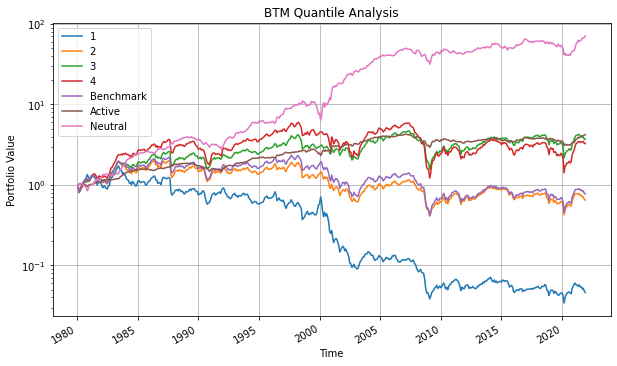

In [26]:
# Plotting the graph
port_values_btm.plot(figsize=(10,6),
                 title='BTM Quantile Analysis',
                 xlabel='Time',
                 ylabel='Portfolio Value',
                 logy=True, grid=True)

### 4) Calculating predictive power

In [27]:
# Using ic_analysis() method
icbtm = ap.ic_analysis(signal['btm'], prices['price'], frequency='annual')
icbtm

Average IC: 0.078 

Percentage of Positive Periods: 0.659 

Percentage of Negative Periods: 0.341 

T-Stat: 3.909 P-Value: 0.0 



date
1980-12-31    0.284086
1981-12-31    0.119824
1982-12-31    0.218090
1983-12-30    0.265062
1984-12-31   -0.010445
1985-12-31    0.038799
1986-12-31    0.053302
1987-12-31    0.125503
1988-12-30   -0.070423
1989-12-29   -0.121163
1990-12-31   -0.056927
1991-12-31    0.219935
1992-12-31    0.163027
1993-12-31    0.136200
1994-12-30    0.037370
1995-12-29    0.117621
1996-12-31    0.172383
1997-12-31   -0.022228
1998-12-31   -0.035351
1999-12-31    0.195312
2000-12-29    0.230980
2001-12-31    0.249937
2002-12-31    0.184768
2003-12-31    0.174142
2004-12-31    0.087323
2005-12-30    0.112594
2006-12-29   -0.085583
2007-12-31   -0.023675
2008-12-31    0.189070
2009-12-31    0.011927
2010-12-31   -0.016563
2011-12-30    0.106094
2012-12-31    0.025005
2013-12-31    0.040358
2014-12-31   -0.027450
2015-12-31    0.240012
2016-12-30   -0.083857
2017-12-29   -0.065417
2018-12-31   -0.098676
2019-12-31   -0.190741
2020-12-31    0.291459
Name: IC_btm, dtype: float64

<AxesSubplot:title={'center':'Predictive Power of BTM over time'}, xlabel='date'>

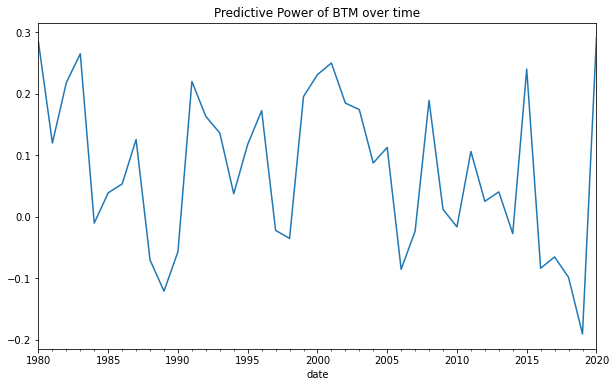

In [28]:
# Plotting the IC analysis result
icbtm.plot(kind = 'line', figsize=(10,6), title="Predictive Power of BTM over time")

#### Predictive power of BTM, EP12 and EPQ respectively

In [29]:
# Making single dataframe with all IC_analytics
ic_tot = ic12.to_frame().join(ic3)
ic_tot = icbtm.to_frame().join(ic_tot)
ic_tot.index=ic_tot.index.year

In [30]:
# Applying pearson correlation
ic_tot.corr(method='pearson')

,IC_btm,IC_ep12,IC_epq
IC_btm,1.000000,0.385568,0.444702
IC_ep12,0.385568,1.000000,0.980400
IC_epq,0.444702,0.980400,1.000000


<AxesSubplot:title={'center':'IC Comparison - EPQ Vs EP12 Vs BTM'}, xlabel='date'>

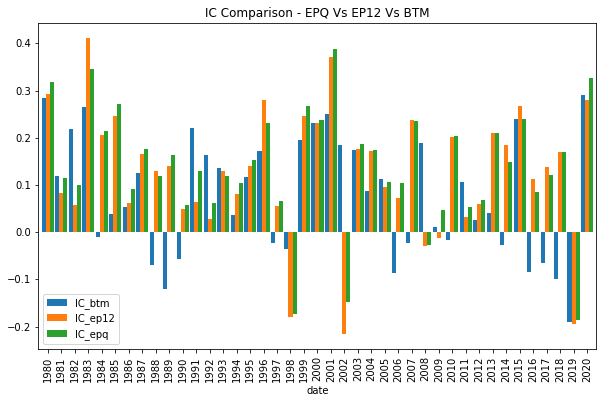

In [31]:
# Plotting the graph
ic_tot.plot(kind='bar',
            figsize=(10, 6),
            title='IC Comparison - EPQ Vs EP12 Vs BTM',
            legend=True, width=0.9)

# Backtesting EPQ

### 1) Loading the Data

In [32]:
# Squeezing the prices data
prices = prices.squeeze()

### 2) Backtesting

In [33]:
# Using ap.backtesting with mentioned conditions
p_ret, p_turn, p_comp, p_perf = ap.backtesting(factor,prices,market_cap,start="2005-01-01", end="2020-12-31", t_cost=0.002,N=250)

In [34]:
# A DataFrame with the monthly return of the portfolio, the benchmark and the difference betwen the two (called Active Return)
p_ret.head()

,Portfolio,Benchmark,Active
date,,,
2005-01-31,0.104126,0.018505,0.085620
2005-02-28,-0.018070,-0.019587,0.001517
2005-03-31,-0.047771,-0.026834,-0.020937
2005-04-29,0.045200,0.035946,0.009254
2005-05-31,0.038312,0.006036,0.032276


In [35]:
# A DataFrame with the monthly turnover and transaction costs of the strategy
p_turn.head()

,Turnover,T-Cost
date,,
2005-01-31,0.500000,0.001000
2005-02-28,0.511132,0.001022
2005-03-31,0.359479,0.000719
2005-04-29,0.403414,0.000807
2005-05-31,0.609242,0.001218


In [36]:
# A DataFrame with the composition of portfolio and benchmark
p_comp.head()

Portfolio  Benchmark
id    date                            
10001 2005-01-31   0.000000   0.000001
      2005-02-28   0.000032   0.000001
      2005-03-31   0.000000   0.000001
      2005-04-29   0.000000   0.000001
      2005-05-31   0.000035   0.000002

In [37]:
# A DataFrame with a number of performance metrics for portfolio, benchmark and active portfolio
p_perf

,Portfolio,Benchmark,Active
Mean Return,0.040140,0.063838,-0.023698
St. Dev.,0.230274,0.156919,0.111499
RR Ratio,0.174313,0.406818,-0.212539
% Positive,0.604167,0.651042,0.494792
Worst Month,-0.378713,-0.201336,-0.177377
Best Month,0.187581,0.123162,0.086454
Max DrawDown,-1.002301,-0.694557,-0.331825


### 3. Assessing the performance of the strategy

<AxesSubplot:title={'center':'EPQ Strategy'}, xlabel='Time', ylabel='Portfolio Value'>

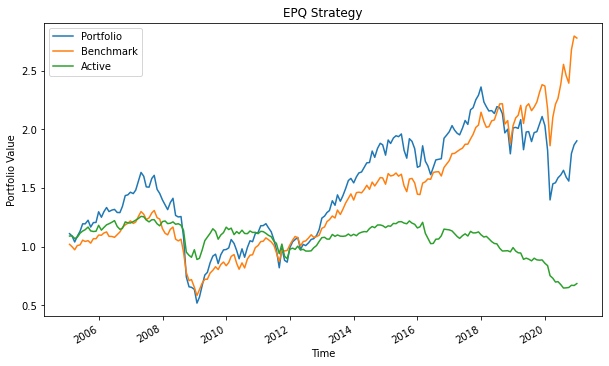

In [38]:
# Assessing performance
port_values = p_ret.cumsum().apply(np.exp)
port_values.plot(figsize=(10,6),
                 title='EPQ Strategy',
                 ylabel='Portfolio Value',
                 xlabel='Time')

<AxesSubplot:title={'center':'Active Return'}, xlabel='Year', ylabel='(%)'>

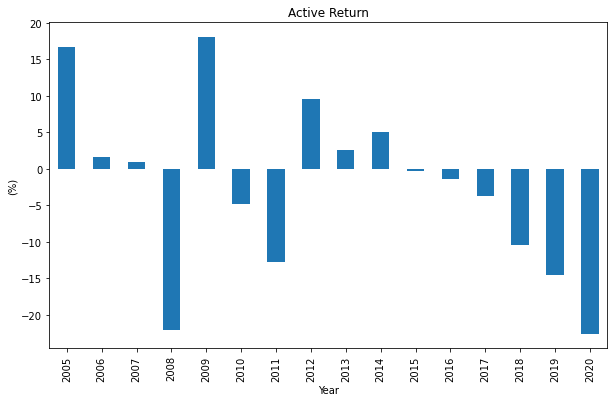

In [39]:
#we generate a column with the years extracted by the index
p_ret['year'] = p_ret.index.year

#we sum the monthly Active_returns by year
active_return = p_ret.groupby('year')['Active'].sum()*100

#we plot
active_return.plot(figsize=(10,6),
          kind='bar',
          title='Active Return',
          ylabel='(%)',
          xlabel='Year')

In [40]:
# joining it with names dataframe
p_comp = p_comp.join(names, how='left')

#### 3.1) Industry wise portfolio exposure

In [41]:
# calculating portfolio exposure
port_exposure = p_comp.groupby(['date', 'industry'])['Portfolio'].sum()
port_exposure.head()

date        industry             
2005-01-31  Business Equipment       0.044655
            Chemicals                0.008139
            Consumer Durables        0.008863
            Consumer non Durables    0.020332
            Finance                  0.173620
Name: Portfolio, dtype: float64

In [42]:
port_exposure = port_exposure.unstack(level=1)

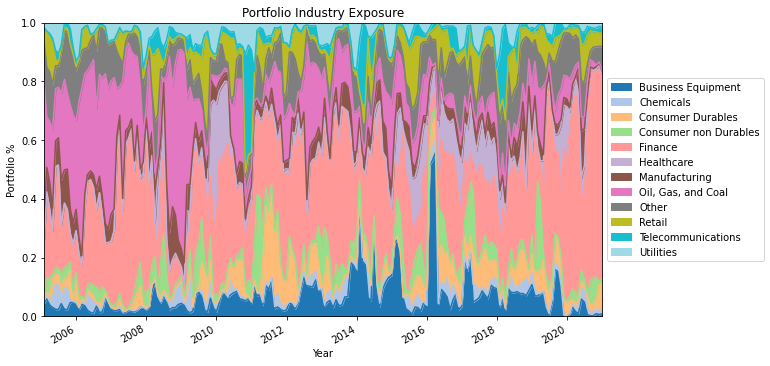

In [43]:
#and then we can plot
port_exposure.plot(figsize=(10,6),
                   kind='area',
                   ylabel='Portfolio %',
                   xlabel='Year',
                   title='Portfolio Industry Exposure',
                   colormap='tab20',
                   ylim=[0,1],
                   xlim=[port_exposure.index.min(), port_exposure.index.max()])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### 3.1) Industry wise benchmark exposure

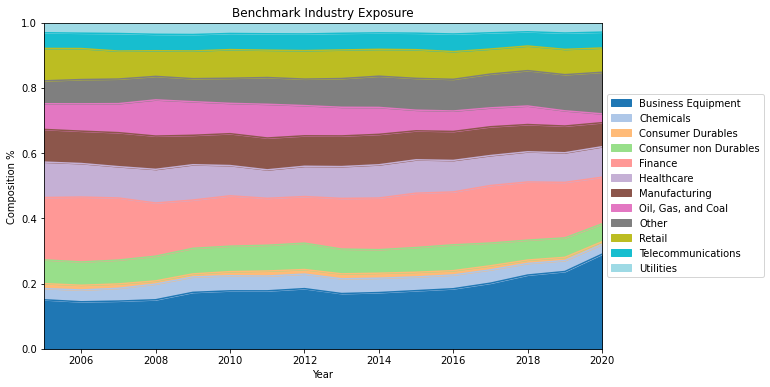

In [44]:
#we sum the weights of the stocks for each industry and month
bench_exposure = p_comp.groupby(['date', 'industry'])['Benchmark'].sum()

#we put the data of each industry in a different column
bench_exposure = bench_exposure.unstack(level=1)

#we xtract the year from the index
bench_exposure['year'] = bench_exposure.index.year

#we take the mean average exposure within each year and plot
bench_exposure = bench_exposure.groupby('year').mean()

bench_exposure.plot(figsize=(10,6),
                    kind='area',
                    ylabel='Composition %',
                    xlabel='Year',
                    title='Benchmark Industry Exposure',
                    colormap='tab20',
                    ylim=[0,1],
                    xlim=[bench_exposure.index.min(), bench_exposure.index.max()])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Combination with Low-Volatility Factor

In [45]:
#combining it with low volatility factor
combined_epq = ((EPQ['epq']+total_volatility['tvol'])/2).dropna().to_frame().squeeze()

In [46]:
# Using ap.backtesting with mentioned conditions
p_ret, p_turn, p_comp, p_perf = ap.backtesting(combined_epq,prices,market_cap,start="2005-01-01", end="2020-12-31", t_cost=0.002,N=250)

In [47]:
# checking performance
p_perf

,Portfolio,Benchmark,Active
Mean Return,0.068328,0.065040,0.003287
St. Dev.,0.115091,0.151725,0.070771
RR Ratio,0.593682,0.428672,0.046452
% Positive,0.614583,0.656250,0.468750
Worst Month,-0.124587,-0.189290,-0.058786
Best Month,0.085754,0.116055,0.075365
Max DrawDown,-0.443312,-0.672883,-0.177754


<AxesSubplot:title={'center':'Combined Strategy'}, xlabel='Time', ylabel='Portfolio Value'>

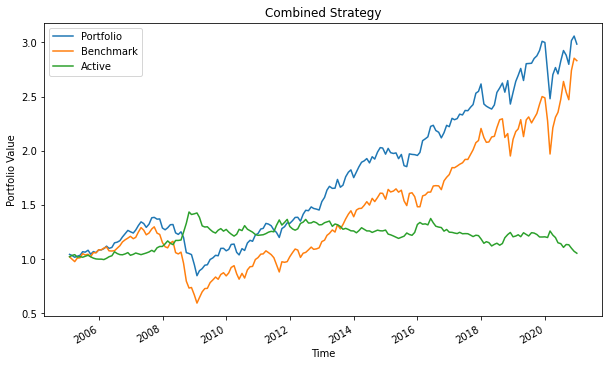

In [48]:
# Assessing performance
port_values = p_ret.cumsum().apply(np.exp)
port_values.plot(figsize=(10,6),
                 title='Combined Strategy',
                 ylabel='Portfolio Value',
                 xlabel='Time')

## Strategy Optimization

In [49]:
# Looping through mentioned parameters to get best parameters
numbers_stocks = [100, 250, 1000]
rebalancing_month = [1,3,12]

info_ratio=[]

for number in numbers_stocks:
    for month in rebalancing_month:
        p_ret, p_turn, p_comp, p_perf = ap.backtesting(combined_epq,prices,market_cap,start="2005-01-01", end="2020-12-31", t_cost=0.002,N=number, frequency=month)
        info_ratio.append((number, month, p_perf.loc['RR Ratio', 'Active']))
    
print(info_ratio)

[(100, 1, 0.0841926686352175), (100, 3, 0.14101886266700359), (100, 12, 0.13536551318305193), (250, 1, 0.046451984113008944), (250, 3, -0.02344952250333858), (250, 12, 0.015306359415971638), (1000, 1, 0.10735181318741385), (1000, 3, 0.12106478094060791), (1000, 12, 0.19541187750372746)]


In [50]:
# Result
number_of_stock = []
number_of_month = []
result = []
for i in info_ratio:
    i = list(i)
    number_of_stock.append(i[0])
    number_of_month.append(i[1])
    result.append(i[2])
df = pd.DataFrame({"Stocks":number_of_stock, "Month":number_of_month, "Information Ratio":result})
df

,Stocks,Month,Information Ratio
0,100,1,0.084193
1,100,3,0.141019
2,100,12,0.135366
3,250,1,0.046452
4,250,3,-0.023450
5,250,12,0.015306
6,1000,1,0.107352
7,1000,3,0.121065
8,1000,12,0.195412
